# Importing the Libraries.

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#  Loading and splitting the dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Let's look at an image

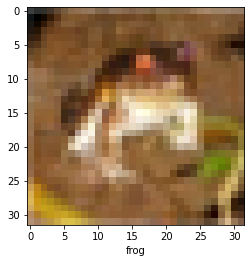

In [4]:
IMG_INDEX = 0  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(12, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Flatten())
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(10))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 12)        336       
                                                                 
 flatten (Flatten)           (None, 10800)             0         
                                                                 
 dense (Dense)               (None, 12)                129612    
                                                                 
 dense_1 (Dense)             (None, 10)                130       
                                                                 
Total params: 130,078
Trainable params: 130,078
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,batch_size=32, 
                    validation_data=(test_images, test_labels))

1563/1563 [==============================] - 13s 8ms/step - loss: 1.8219 - accuracy: 0.2280 - val_loss: 1.8523 - val_accuracy: 0.2268


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 1.8523 - accuracy: 0.2268 - 874ms/epoch - 3ms/step
0.22679999470710754
